# 선형 분류 - 로지스틱 회귀 (Logistic Regression)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader

### 데이터셋을 만들기 make_classificaiton 함수를 사용하여 무작위로 데이터셋을 만들기

In [2]:
x, y = make_classification(
    n_samples=3000, # 생성할 데이터 수 
    n_features=5,   # 독립변수 수 (입력변수에 사용되는 변수) / 종속변수 -> 라벨 
    n_informative=2,# 독립변수 수 중에서 실제로 유의미한 의미가 있는 변수 계수 
    n_redundant=0,  # 독립변수 중에 다른 독립 변수로부터 파생된 불필요한 독립변수 계수 
    n_clusters_per_class=1, # 클래스당 클러스트 계수 
    random_state=42         # 난수 생성 발생기의 시드값 
)

print(x, y)

[[-0.02439857 -0.57540077  1.26796049 -1.42222965 -0.9629849 ]
 [-1.07638119  0.3872175   1.08299994 -0.67379011 -2.65098736]
 [-1.12984986 -0.26922916  1.12735009 -0.82383687 -1.70574586]
 ...
 [-0.53797853  0.26401859 -0.48915618  0.4664446  -1.57451325]
 [ 0.01920342  0.9761859  -0.14717165 -1.51725386  2.31873002]
 [-0.37051336  0.93603022 -0.62133172 -0.23084897  1.66473405]] [0 0 0 ... 0 1 1]


### 이제 데이터셋을 Train set 과 Test set 으로 나누기 

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train >> " , len(x_train))
print("x_test >> ", len(x_test))
print("y_train >> ", len(y_train))
print("y_test >> ", len(y_test))

x_train >>  2400
x_test >>  600
y_train >>  2400
y_test >>  600


### Pytorc의 Dataset 과 Dataloader 를 사용하기 위한 Custom Dataset 구현 

In [4]:
class MyCustomDataset(Dataset) :
    def __init__(self, x, y) : 
        # 텐서형태로 변환 
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        
        
    def __getitem__(self, index) :
        
        return self.x[index], self.y[index]
        
    
    def __len__(self) : 
        return len(self.x)

# 데이터셋 정의     
train_dataset = MyCustomDataset(x_train, y_train)
test_dataset = MyCustomDataset(x_test, y_test)

# 데이터 로드 정의 
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle=False)

# ########## 디버깅 코드 ##############
# test = MyCustomDataset(x_test, y_test)
# for i in test : 
#     print(i)
########## 디버깅 코드 ##############
# for index, (datas, lables) in enumerate(test_loader) : 
#     print(index, datas, lables)

### 모델 정의 

In [5]:
class LogisticRegression(nn.Module) : 
    def __init__(self, input_dim) : 
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x) :
        out = self.linear(x)
        out = torch.sigmoid(out)
        
        return out
    
model = LogisticRegression(input_dim=5)
print(model)

LogisticRegression(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)


### 모델을 학습시키기 전에 학습에 필요한 Loss function, optimizer 선언

In [6]:
from adamp import SGDP
"""
# define your params
optimizer = SGDP(params, lr=0.1, weight_decay=1e-5, momentum=0.9, nesterov=True)
"""
criterion = nn.BCELoss() # 사용한 이유는 0과 1 분류 이진분류 하기 떄문입니다. 
# optimizer = SGDP(model.parameters(), lr=0.25, weight_decay=1e-5, momentum=0.9, nesterov=True)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5, momentum=0.9, nesterov=True)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: True
    weight_decay: 1e-05
)


### tarin loop 구현 

In [7]:
num_epochs = 100

for epoch in range(num_epochs) : 
    for inputs, targets in train_loader : 
#         print(targets)
#         print("unsqueeze >> ", targets.unsqueeze(1))
        # optimizer 초기화 진행 
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        
        optimizer.step()
    
    if epoch % 10 == 0 :
        print(f"Epoch : [{epoch+1}/{num_epochs}], Loss : [{loss.item():.4f}]")
        
    """
    SGDP
    Epoch : [1/100], Loss : [0.2932]
    Epoch : [11/100], Loss : [0.2758]
    Epoch : [21/100], Loss : [0.1802]
    Epoch : [31/100], Loss : [0.4343]
    Epoch : [41/100], Loss : [0.1413]
    Epoch : [51/100], Loss : [0.2233]
    Epoch : [61/100], Loss : [0.2452]
    Epoch : [71/100], Loss : [0.1318]
    Epoch : [81/100], Loss : [0.2263]
    Epoch : [91/100], Loss : [0.2263]
    
    SGD 
    Epoch : [1/100], Loss : [0.3412]
    Epoch : [11/100], Loss : [0.2807]
    Epoch : [21/100], Loss : [0.3580]
    Epoch : [31/100], Loss : [0.3004]
    Epoch : [41/100], Loss : [0.2017]
    Epoch : [51/100], Loss : [0.2862]
    Epoch : [61/100], Loss : [0.2308]
    Epoch : [71/100], Loss : [0.2103]
    Epoch : [81/100], Loss : [0.2252]
    Epoch : [91/100], Loss : [0.2543]
    """
 

Epoch : [1/100], Loss : [0.3466]
Epoch : [11/100], Loss : [0.1402]
Epoch : [21/100], Loss : [0.2599]
Epoch : [31/100], Loss : [0.4641]
Epoch : [41/100], Loss : [0.3604]
Epoch : [51/100], Loss : [0.2491]
Epoch : [61/100], Loss : [0.2623]
Epoch : [71/100], Loss : [0.2412]
Epoch : [81/100], Loss : [0.5629]
Epoch : [91/100], Loss : [0.1638]


### 평가 코드 작성 

In [8]:
# device on GPU 인지 혹은 CPU 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device >> ", device)

model.eval()
with torch.no_grad() : 
    correct = 0
    total = 0
    for test_inputs, test_targets in test_loader : 
#         print(test_inputs, test_targets)
        test_input, test_target = test_inputs.to(device), test_targets.to(device)
        outputs_test = model(test_input)
        _, pred_test = torch.max(outputs_test, 1)
        total += test_targets.size(0)
        correct += (pred_test == test_targets).sum().item()
        
    print("Acc >> %d%%"%(100 * correct / total))
        
        

Using device >>  cpu
Acc >> 48%


# 공개되어 있는 데이터를 가지고 로지스틱 회귀 진행 실습

- 각 이미지 크기는 28 x 28 / 흑백 이미지 / 총 10개의 클래스 

In [9]:
"""
Fashion-MNIST 라벨 구성 요소
0 - 티셔츠 
1 - 바지
2 - 스웨터 
3 - 드레스 
4 - 코트 
5 - 샌들 
6 - 셔츠 
7 - 운동화 
8 - 가방
9 - 앵글 부츠 
"""

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### 데이터셋 다운로드 하고 Dataloader 생성하기

In [10]:
# 데이터셋 다운로드 및 Dataloader 생성 
train_dataset = dataset.FashionMNIST(root="./data", train=True, transform=transforms.ToTensor(),download=False)
test_dataset = dataset.FashionMNIST(root="./data", train=False, transform=transforms.ToTensor(),download=False)

# train Loader test Loader 설정 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = 100, shuffle=False)

### 모델 정의

In [11]:
class LogisticRegression(nn.Module) : 
    def __init__(self, input_size, num_classes) : 
        super(LogisticRegression, self).__init__() 
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x) : 
        out = self.linear(x)
        return out

### 하이퍼 파라미터 설정 

In [12]:
input_size = 28 * 28
num_classes = 10
num_epochs = 10
lr = 0.001

total_step = len(train_loader)

### 모델, Loss, 옵티마이저 정의

In [13]:
model = LogisticRegression(input_size=input_size, num_classes=num_classes)
# print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# device setting 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using Device >>" , device)

model.to(device)

Using Device >> cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

### train loop

Epoch [1/10], Step [100/600], Loss : 1.3201, Train ACC : 0.7100
Epoch [1/10], Step [200/600], Loss : 1.0378, Train ACC : 0.7000
Epoch [1/10], Step [300/600], Loss : 0.9044, Train ACC : 0.7267
Epoch [1/10], Step [400/600], Loss : 0.9360, Train ACC : 0.7375
Epoch [1/10], Step [500/600], Loss : 0.8424, Train ACC : 0.7280
Epoch [1/10], Step [600/600], Loss : 0.7723, Train ACC : 0.7300
Epoch [2/10], Step [100/600], Loss : 0.7824, Train ACC : 0.7800
Epoch [2/10], Step [200/600], Loss : 0.6855, Train ACC : 0.7650
Epoch [2/10], Step [300/600], Loss : 0.8358, Train ACC : 0.7400
Epoch [2/10], Step [400/600], Loss : 0.6745, Train ACC : 0.7550
Epoch [2/10], Step [500/600], Loss : 0.6930, Train ACC : 0.7640
Epoch [2/10], Step [600/600], Loss : 0.6665, Train ACC : 0.7650
Epoch [3/10], Step [100/600], Loss : 0.7102, Train ACC : 0.7700
Epoch [3/10], Step [200/600], Loss : 0.6361, Train ACC : 0.7950
Epoch [3/10], Step [300/600], Loss : 0.7085, Train ACC : 0.7900
Epoch [3/10], Step [400/600], Loss : 0.6

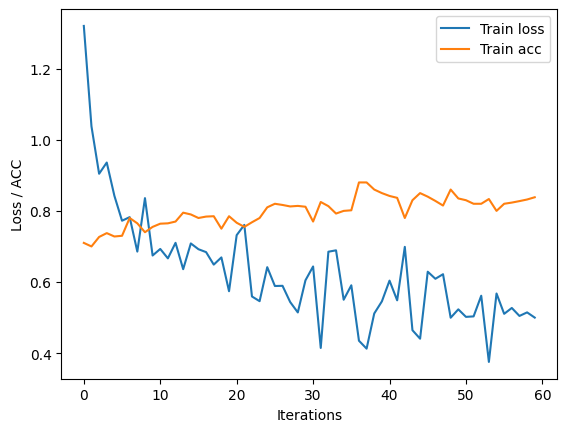

In [14]:
loss_list = []
acc_list = []

for epoch in range(num_epochs) :
    correct = 0
    total = 0 
    for i, (images, labels) in enumerate(train_loader) : 
        # 데이터 로드 
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        # 순전파 및 Loss 계산 
        ouptuts = model(images)
        loss = criterion(ouptuts, labels)
        
        # 역전파 및 가중치 업데이트 
        loss.backward()
        optimizer.step()
        
        # 로그 출력 
        if (i+1) % 100 == 0 :
            loss_list.append(loss.item())
            _, predicted = torch.max(ouptuts.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            
            print("Epoch [{}/{}], Step [{}/{}], Loss : {:.4f}, Train ACC : {:.4f}".format(
                epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))
            
            
# 손실 및 정확도 그래프 출력 
plt.plot(loss_list, label="Train loss")
plt.plot(acc_list, label="Train acc")
plt.xlabel('Iterations')
plt.ylabel('Loss / ACC')
plt.legend()
plt.show()

### 테스트 시각화 

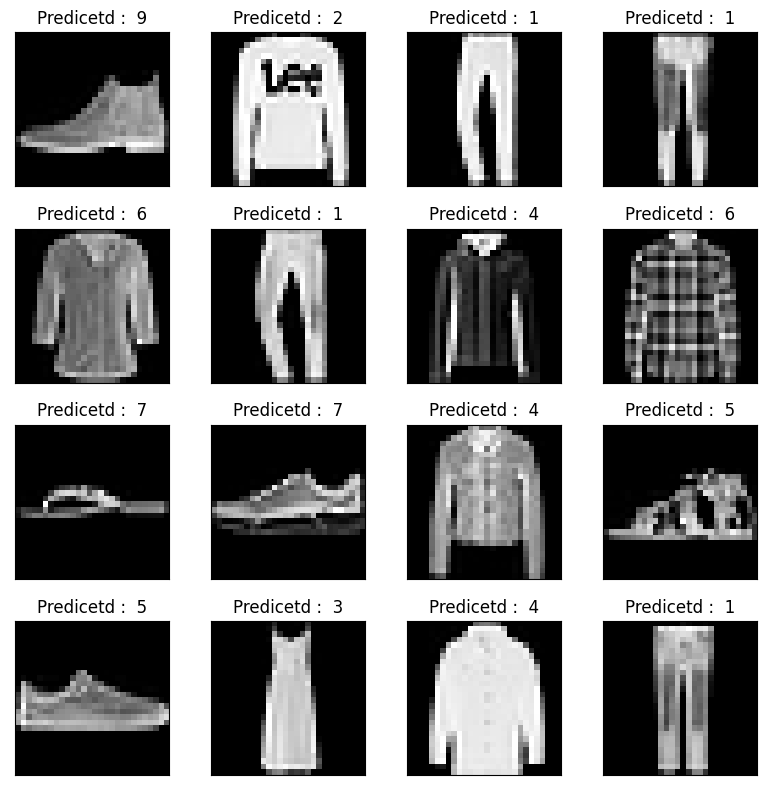

In [15]:
import numpy as np

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = 100, shuffle=False)
"""
batch_size 만큼 이미지가 넘어옴 16이상 으로 설정하시면됩니다.
"""

# 테스트 이미지 가져오기 
dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images = images.reshape(-1, 28 * 28)

# 모델 예측 
model.eval()
outputs_temp = model(images)
_, predicted_test = torch.max(outputs_temp.data,1)

# 이미지와 예측값 시각화 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat) : 
    ax.imshow(np.squeeze(images[i].reshape(28,28)), cmap='gray')
    ax.set_title(f"Predicetd :  {predicted_test[i].item()}")
    
plt.tight_layout()
plt.show()

# 로지스틱 희귀 앙상블 실습

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 데이터셋, 데이터 로더 생성

In [17]:
dataset = FashionMNIST(root="./data", train=True, transform=ToTensor(), download=False)
train_set, val_set = train_test_split(dataset, test_size=0.1, random_state=777)

train_loader = DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = DataLoader(val_set, batch_size=100, shuffle=False)

### 모델 선언

In [18]:
class LogisticRegression(nn.Module) : 
    def __init__(self, input_size, num_classes) : 
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x) : 
        out = self.linear(x)
        
        return out

### 하이퍼 파라미터 설정 

In [19]:
input_size = 28 * 28 
num_classes = 10
num_epoch = 100
lr =  0.001
num_models = 5 # 앙상블에 사용할 모델 개수

### 앙상블 

In [20]:
models = [LogisticRegression(input_size, num_classes) for _ in range(num_models)]
print(models)

[LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)]


### 모델, 손실 함수, 옵티마이저 정의

In [21]:
criterion = nn.CrossEntropyLoss()
optimizers = [optim.SGD(model.parameters(), lr=lr) for model in models]
print(optimizers)

[SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)]


### train loop

In [23]:
for epoch in range(num_epoch) : 
    for i, (images, labels) in enumerate(train_loader) :
        # 데이터 로드 
        images = images.reshape(-1, input_size)
        labels = labels
        
        # 순전파 및 손실 계산 
        for j in range(num_models) : 
            outputs = models[j](images)
            loss = criterion(outputs, labels)
            
           # 역전파 및 가중치 업데이트
            optimizers[j].zero_grad()
            loss.backward()
            optimizers[j].step()
            
    # 검증 코드 추가 #
    with torch.no_grad() : 
        total, correct = 0,0 
        for images, labels in test_loader : 
            images = images.reshape(-1, input_size)
            """
            outputs = torch.zeros(images.size()[0], num_classes)
            이미지 배치에 대한 출력 텐서 초기화 
            >> 후속 단계에서 이미지에 대한 예측값 업데이트 가능
            """
            outputs = torch.zeros(images.size()[0], num_classes)
            # 앙상블 모델의 예측값 더하기 
            for j in range(num_models) : 
                outputs += models[j](images)
                
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        val_acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epoch}], Val ACC >> {val_acc:.2f}%")


Epoch [1/100], Val ACC >> 65.38%
Epoch [2/100], Val ACC >> 67.32%
Epoch [3/100], Val ACC >> 68.02%
Epoch [4/100], Val ACC >> 68.95%
Epoch [5/100], Val ACC >> 70.27%
Epoch [6/100], Val ACC >> 71.77%
Epoch [7/100], Val ACC >> 72.72%
Epoch [8/100], Val ACC >> 73.72%
Epoch [9/100], Val ACC >> 74.78%
Epoch [10/100], Val ACC >> 75.48%
Epoch [11/100], Val ACC >> 75.95%
Epoch [12/100], Val ACC >> 76.52%
Epoch [13/100], Val ACC >> 76.80%
Epoch [14/100], Val ACC >> 77.18%
Epoch [15/100], Val ACC >> 77.57%
Epoch [16/100], Val ACC >> 77.80%
Epoch [17/100], Val ACC >> 78.05%
Epoch [18/100], Val ACC >> 78.28%
Epoch [19/100], Val ACC >> 78.48%
Epoch [20/100], Val ACC >> 78.80%
Epoch [21/100], Val ACC >> 79.00%
Epoch [22/100], Val ACC >> 79.30%
Epoch [23/100], Val ACC >> 79.32%
Epoch [24/100], Val ACC >> 79.58%
Epoch [25/100], Val ACC >> 79.62%
Epoch [26/100], Val ACC >> 79.75%
Epoch [27/100], Val ACC >> 79.82%
Epoch [28/100], Val ACC >> 80.07%
Epoch [29/100], Val ACC >> 80.05%
Epoch [30/100], Val ACC

# 로지스틱 회귀의 결정 경계 실습 

In [24]:
import torch
import torch.nn.functional as F 
import numpy as np 
import matplotlib.pyplot as plt 

### 임의의 데이터 생성

In [25]:
x = torch.randn(100, 2)
y =((x[:,0] > 0.5) & (x[:,1] >0.5)).float()

print(x, y)

tensor([[ 0.3495,  0.4155],
        [-0.7144,  1.0777],
        [-1.7717,  0.4143],
        [-0.7013, -0.9597],
        [-0.8098,  0.2548],
        [-0.9236,  0.0291],
        [-1.0571,  0.3431],
        [-0.6505, -0.1209],
        [ 0.0056, -0.9137],
        [ 1.0332,  1.1768],
        [ 0.1259,  0.6664],
        [ 0.4176, -0.1820],
        [ 0.8931, -1.1468],
        [ 0.5467,  1.7966],
        [-0.8110,  1.6634],
        [ 0.2707, -0.0584],
        [ 1.6050, -0.9201],
        [-0.5749, -0.0930],
        [ 1.0685,  0.3708],
        [ 0.5796, -1.4618],
        [-0.6206, -0.6146],
        [-0.8126, -0.6968],
        [-2.1310, -2.0614],
        [ 0.8651,  0.0378],
        [-0.3952, -1.3735],
        [-0.4490,  1.3948],
        [-0.8549,  0.0295],
        [ 0.3294, -0.2657],
        [-0.0383,  0.0190],
        [-0.3804,  1.0670],
        [ 0.8749,  0.0872],
        [ 0.4593, -1.3312],
        [ 0.6559,  1.2781],
        [ 1.2192, -1.2421],
        [ 2.1673,  0.0076],
        [ 1.1859, -0

### 모델 정의 

In [26]:
class LogisiticRegression(torch.nn.Module) : 
    def __init__(self, input_dim, output_dim) : 
        super(LogisiticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x) : 
        out = self.linear(x)
        fc = F.sigmoid(out)
        print("fc >>>" ,fc)
        return fc
    
model = LogisiticRegression(input_dim=2, output_dim=1)

print(model)

LogisiticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


### 모델 학습 , 결정 경계 그리기

fc >>> tensor([[0.5259],
        [0.3492],
        [0.2368],
        [0.4143],
        [0.3609],
        [0.3521],
        [0.3248],
        [0.3950],
        [0.5181],
        [0.6020],
        [0.4841],
        [0.5556],
        [0.6539],
        [0.5100],
        [0.3191],
        [0.5297],
        [0.7377],
        [0.4051],
        [0.6322],
        [0.6200],
        [0.4151],
        [0.3899],
        [0.2574],
        [0.6138],
        [0.4731],
        [0.3763],
        [0.3615],
        [0.5453],
        [0.4808],
        [0.3964],
        [0.6136],
        [0.5987],
        [0.5434],
        [0.6995],
        [0.7772],
        [0.6831],
        [0.4313],
        [0.5496],
        [0.5115],
        [0.6259],
        [0.4886],
        [0.6077],
        [0.6674],
        [0.3361],
        [0.6635],
        [0.4264],
        [0.4248],
        [0.6615],
        [0.4786],
        [0.3980],
        [0.4442],
        [0.5758],
        [0.4898],
        [0.2857],
        [0.5384],
   

fc >>> tensor([[0.3663],
        [0.2494],
        [0.1408],
        [0.2083],
        [0.2217],
        [0.2058],
        [0.1990],
        [0.2305],
        [0.2871],
        [0.4871],
        [0.3427],
        [0.3594],
        [0.3990],
        [0.4335],
        [0.2516],
        [0.3428],
        [0.5101],
        [0.2391],
        [0.4685],
        [0.3468],
        [0.2233],
        [0.2026],
        [0.0899],
        [0.4289],
        [0.2311],
        [0.2876],
        [0.2126],
        [0.3451],
        [0.3046],
        [0.2881],
        [0.4318],
        [0.3342],
        [0.4344],
        [0.4435],
        [0.6187],
        [0.4511],
        [0.2927],
        [0.5020],
        [0.3030],
        [0.5098],
        [0.3537],
        [0.3401],
        [0.4918],
        [0.2202],
        [0.5146],
        [0.2742],
        [0.2689],
        [0.4716],
        [0.3674],
        [0.2661],
        [0.3657],
        [0.4235],
        [0.3483],
        [0.1943],
        [0.3292],
   

C:\Users\bomi\anaconda3\envs\AI\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[0.3371],
        [0.2322],
        [0.1249],
        [0.1750],
        [0.1979],
        [0.1813],
        [0.1777],
        [0.2025],
        [0.2462],
        [0.4671],
        [0.3174],
        [0.3226],
        [0.3478],
        [0.4224],
        [0.2405],
        [0.3083],
        [0.4596],
        [0.2107],
        [0.4369],
        [0.2948],
        [0.1914],
        [0.1722],
        [0.0690],
        [0.3930],
        [0.1915],
        [0.2728],
        [0.1875],
        [0.3080],
        [0.2730],
        [0.2694],
        [0.3965],
        [0.2847],
        [0.4159],
        [0.3893],
        [0.5842],
        [0.4028],
        [0.2683],
        [0.4983],
        [0.2655],
        [0.4895],
        [0.3296],
        [0.2896],
        [0.4566],
        [0.2003],
        [0.4859],
        [0.2474],
        [0.2415],
        [0.4332],
        [0.3484],
        [0.2431],
        [0.3536],
        [0.3952],
        [0.3229],
        [0.1786],
        [0.2907],
        [0

fc >>> tensor([[0.3054],
        [0.2136],
        [0.1076],
        [0.1406],
        [0.1723],
        [0.1550],
        [0.1547],
        [0.1726],
        [0.2030],
        [0.4471],
        [0.2901],
        [0.2827],
        [0.2921],
        [0.4128],
        [0.2290],
        [0.2710],
        [0.4029],
        [0.1803],
        [0.4026],
        [0.2394],
        [0.1579],
        [0.1404],
        [0.0492],
        [0.3537],
        [0.1508],
        [0.2571],
        [0.1606],
        [0.2677],
        [0.2389],
        [0.2493],
        [0.3579],
        [0.2321],
        [0.3973],
        [0.3295],
        [0.5458],
        [0.3493],
        [0.2419],
        [0.4983],
        [0.2254],
        [0.4691],
        [0.3038],
        [0.2360],
        [0.4180],
        [0.1786],
        [0.4552],
        [0.2185],
        [0.2121],
        [0.3910],
        [0.3284],
        [0.2182],
        [0.3420],
        [0.3648],
        [0.2956],
        [0.1614],
        [0.2492],
   

fc >>> tensor([[0.2573],
        [0.1847],
        [0.0805],
        [0.0918],
        [0.1328],
        [0.1150],
        [0.1191],
        [0.1275],
        [0.1400],
        [0.4226],
        [0.2489],
        [0.2218],
        [0.2085],
        [0.4063],
        [0.2121],
        [0.2140],
        [0.3140],
        [0.1343],
        [0.3516],
        [0.1593],
        [0.1089],
        [0.0946],
        [0.0251],
        [0.2937],
        [0.0945],
        [0.2341],
        [0.1197],
        [0.2065],
        [0.1869],
        [0.2189],
        [0.2992],
        [0.1559],
        [0.3738],
        [0.2386],
        [0.4887],
        [0.2669],
        [0.2012],
        [0.5128],
        [0.1652],
        [0.4445],
        [0.2653],
        [0.1582],
        [0.3597],
        [0.1447],
        [0.4114],
        [0.1741],
        [0.1668],
        [0.3264],
        [0.3004],
        [0.1796],
        [0.3292],
        [0.3197],
        [0.2544],
        [0.1340],
        [0.1866],
   

fc >>> tensor([[0.2347],
        [0.1706],
        [0.0673],
        [0.0707],
        [0.1139],
        [0.0962],
        [0.1018],
        [0.1064],
        [0.1119],
        [0.4157],
        [0.2296],
        [0.1932],
        [0.1707],
        [0.4093],
        [0.2045],
        [0.1871],
        [0.2723],
        [0.1128],
        [0.3289],
        [0.1246],
        [0.0870],
        [0.0743],
        [0.0164],
        [0.2658],
        [0.0710],
        [0.2237],
        [0.1003],
        [0.1778],
        [0.1623],
        [0.2045],
        [0.2719],
        [0.1227],
        [0.3664],
        [0.1970],
        [0.4644],
        [0.2286],
        [0.1817],
        [0.5299],
        [0.1375],
        [0.4381],
        [0.2476],
        [0.1243],
        [0.3333],
        [0.1280],
        [0.3936],
        [0.1528],
        [0.1452],
        [0.2964],
        [0.2889],
        [0.1609],
        [0.3267],
        [0.2996],
        [0.2352],
        [0.1201],
        [0.1575],
   

fc >>> tensor([[0.2063],
        [0.1517],
        [0.0502],
        [0.0466],
        [0.0894],
        [0.0723],
        [0.0794],
        [0.0800],
        [0.0788],
        [0.4144],
        [0.2051],
        [0.1571],
        [0.1254],
        [0.4222],
        [0.1949],
        [0.1530],
        [0.2206],
        [0.0856],
        [0.3023],
        [0.0847],
        [0.0608],
        [0.0505],
        [0.0082],
        [0.2309],
        [0.0450],
        [0.2110],
        [0.0759],
        [0.1419],
        [0.1309],
        [0.1858],
        [0.2380],
        [0.0842],
        [0.3626],
        [0.1470],
        [0.4391],
        [0.1813],
        [0.1562],
        [0.5670],
        [0.1035],
        [0.4381],
        [0.2256],
        [0.0852],
        [0.3019],
        [0.1057],
        [0.3757],
        [0.1252],
        [0.1173],
        [0.2594],
        [0.2766],
        [0.1362],
        [0.3287],
        [0.2757],
        [0.2110],
        [0.1011],
        [0.1215],
   

fc >>> tensor([[0.1805],
        [0.1329],
        [0.0350],
        [0.0285],
        [0.0673],
        [0.0516],
        [0.0591],
        [0.0572],
        [0.0526],
        [0.4232],
        [0.1827],
        [0.1253],
        [0.0888],
        [0.4461],
        [0.1856],
        [0.1227],
        [0.1768],
        [0.0621],
        [0.2812],
        [0.0546],
        [0.0399],
        [0.0320],
        [0.0035],
        [0.2004],
        [0.0264],
        [0.1993],
        [0.0546],
        [0.1104],
        [0.1028],
        [0.1679],
        [0.2083],
        [0.0548],
        [0.3665],
        [0.1063],
        [0.4252],
        [0.1411],
        [0.1323],
        [0.6195],
        [0.0748],
        [0.4494],
        [0.2060],
        [0.0553],
        [0.2763],
        [0.0845],
        [0.3662],
        [0.0998],
        [0.0919],
        [0.2277],
        [0.2679],
        [0.1129],
        [0.3368],
        [0.2562],
        [0.1890],
        [0.0823],
        [0.0907],
   

fc >>> tensor([[0.1634],
        [0.1193],
        [0.0259],
        [0.0191],
        [0.0533],
        [0.0392],
        [0.0463],
        [0.0436],
        [0.0381],
        [0.4351],
        [0.1676],
        [0.1052],
        [0.0680],
        [0.4687],
        [0.1781],
        [0.1033],
        [0.1504],
        [0.0479],
        [0.2690],
        [0.0386],
        [0.0284],
        [0.0221],
        [0.0018],
        [0.1809],
        [0.0172],
        [0.1906],
        [0.0417],
        [0.0908],
        [0.0849],
        [0.1551],
        [0.1895],
        [0.0391],
        [0.3731],
        [0.0830],
        [0.4220],
        [0.1168],
        [0.1160],
        [0.6635],
        [0.0579],
        [0.4637],
        [0.1928],
        [0.0394],
        [0.2612],
        [0.0703],
        [0.3640],
        [0.0833],
        [0.0756],
        [0.2080],
        [0.2630],
        [0.0971],
        [0.3452],
        [0.2442],
        [0.1741],
        [0.0693],
        [0.0721],
   

fc >>> tensor([[0.1511],
        [0.1090],
        [0.0201],
        [0.0139],
        [0.0440],
        [0.0312],
        [0.0379],
        [0.0350],
        [0.0294],
        [0.4461],
        [0.1564],
        [0.0915],
        [0.0551],
        [0.4877],
        [0.1717],
        [0.0901],
        [0.1330],
        [0.0388],
        [0.2608],
        [0.0294],
        [0.0216],
        [0.0163],
        [0.0010],
        [0.1673],
        [0.0122],
        [0.1836],
        [0.0334],
        [0.0777],
        [0.0728],
        [0.1452],
        [0.1763],
        [0.0299],
        [0.3794],
        [0.0684],
        [0.4228],
        [0.1009],
        [0.1042],
        [0.6977],
        [0.0471],
        [0.4770],
        [0.1830],
        [0.0301],
        [0.2512],
        [0.0603],
        [0.3642],
        [0.0719],
        [0.0645],
        [0.1944],
        [0.2595],
        [0.0858],
        [0.3521],
        [0.2358],
        [0.1631],
        [0.0599],
        [0.0600],
   

fc >>> tensor([[1.4317e-01],
        [1.0211e-01],
        [1.6809e-02],
        [1.1074e-02],
        [3.8480e-02],
        [2.6624e-02],
        [3.2833e-02],
        [2.9965e-02],
        [2.4600e-02],
        [4.5422e-01],
        [1.4902e-01],
        [8.3167e-02],
        [4.7709e-02],
        [5.0082e-01],
        [1.6696e-01],
        [8.1930e-02],
        [1.2243e-01],
        [3.3433e-02],
        [2.5574e-01],
        [2.4338e-02],
        [1.7805e-02],
        [1.3247e-02],
        [6.8289e-04],
        [1.5870e-01],
        [9.5947e-03],
        [1.7859e-01],
        [2.8618e-02],
        [6.9741e-02],
        [6.5398e-02],
        [1.3854e-01],
        [1.6786e-01],
        [2.4824e-02],
        [3.8394e-01],
        [5.9944e-02],
        [4.2461e-01],
        [9.1373e-02],
        [9.6590e-02],
        [7.2028e-01],
        [4.0806e-02],
        [4.8672e-01],
        [1.7640e-01],
        [2.5019e-02],
        [2.4490e-01],
        [5.4085e-02],
        [3.6495e-01],
   

fc >>> tensor([[1.3614e-01],
        [9.5974e-02],
        [1.4207e-02],
        [8.9978e-03],
        [3.3916e-02],
        [2.2940e-02],
        [2.8724e-02],
        [2.5932e-02],
        [2.0853e-02],
        [4.6180e-01],
        [1.4244e-01],
        [7.6102e-02],
        [4.1802e-02],
        [5.1279e-01],
        [1.6240e-01],
        [7.5019e-02],
        [1.1359e-01],
        [2.9114e-02],
        [2.5127e-01],
        [2.0474e-02],
        [1.4895e-02],
        [1.0901e-02],
        [4.7564e-04],
        [1.5117e-01],
        [7.6973e-03],
        [1.7384e-01],
        [2.4753e-02],
        [6.3115e-02],
        [5.9177e-02],
        [1.3246e-01],
        [1.6051e-01],
        [2.0940e-02],
        [3.8812e-01],
        [5.3138e-02],
        [4.2688e-01],
        [8.3429e-02],
        [8.9971e-02],
        [7.4009e-01],
        [3.5737e-02],
        [4.9584e-01],
        [1.7047e-01],
        [2.1102e-02],
        [2.3947e-01],
        [4.8810e-02],
        [3.6594e-01],
   

fc >>> tensor([[1.2955e-01],
        [9.0195e-02],
        [1.2031e-02],
        [7.3453e-03],
        [2.9942e-02],
        [1.9810e-02],
        [2.5169e-02],
        [2.2497e-02],
        [1.7747e-02],
        [4.6922e-01],
        [1.3620e-01],
        [6.9771e-02],
        [3.6769e-02],
        [5.2425e-01],
        [1.5780e-01],
        [6.8809e-02],
        [1.0569e-01],
        [2.5413e-02],
        [2.4707e-01],
        [1.7310e-02],
        [1.2507e-02],
        [9.0070e-03],
        [3.3405e-04],
        [1.4419e-01],
        [6.2093e-03],
        [1.6911e-01],
        [2.1458e-02],
        [5.7241e-02],
        [5.3640e-02],
        [1.2664e-01],
        [1.5368e-01],
        [1.7748e-02],
        [3.9213e-01],
        [4.7287e-02],
        [4.2952e-01],
        [7.6393e-02],
        [8.3859e-02],
        [7.5837e-01],
        [3.1388e-02],
        [5.0479e-01],
        [1.6477e-01],
        [1.7884e-02],
        [2.3440e-01],
        [4.4083e-02],
        [3.6707e-01],
   

fc >>> tensor([[1.2314e-01],
        [8.4554e-02],
        [1.0144e-02],
        [5.9767e-03],
        [2.6351e-02],
        [1.7051e-02],
        [2.1978e-02],
        [1.9459e-02],
        [1.5068e-02],
        [4.7671e-01],
        [1.3005e-01],
        [6.3862e-02],
        [3.2296e-02],
        [5.3563e-01],
        [1.5302e-01],
        [6.3001e-02],
        [9.8305e-02],
        [2.2118e-02],
        [2.4292e-01],
        [1.4608e-02],
        [1.0469e-02],
        [7.4171e-03],
        [2.3333e-04],
        [1.3743e-01],
        [4.9941e-03],
        [1.6424e-01],
        [1.8541e-02],
        [5.1820e-02],
        [4.8516e-02],
        [1.2084e-01],
        [1.4703e-01],
        [1.5013e-02],
        [3.9608e-01],
        [4.2036e-02],
        [4.3252e-01],
        [6.9888e-02],
        [7.7997e-02],
        [7.7582e-01],
        [2.7507e-02],
        [5.1384e-01],
        [1.5908e-01],
        [1.5127e-02],
        [2.2945e-01],
        [3.9692e-02],
        [3.6830e-01],
   

fc >>> tensor([[1.1819e-01],
        [8.0220e-02],
        [8.8424e-03],
        [5.0685e-03],
        [2.3776e-02],
        [1.5115e-02],
        [1.9706e-02],
        [1.7319e-02],
        [1.3221e-02],
        [4.8263e-01],
        [1.2528e-01],
        [5.9487e-02],
        [2.9125e-02],
        [5.4451e-01],
        [1.4914e-01],
        [5.8695e-02],
        [9.2808e-02],
        [1.9784e-02],
        [2.3965e-01],
        [1.2761e-02],
        [9.0795e-03],
        [6.3495e-03],
        [1.7520e-04],
        [1.3224e-01],
        [4.1975e-03],
        [1.6032e-01],
        [1.6488e-02],
        [4.7848e-02],
        [4.4755e-02],
        [1.1630e-01],
        [1.4191e-01],
        [1.3138e-02],
        [3.9914e-01],
        [3.8278e-02],
        [4.3507e-01],
        [6.5103e-02],
        [7.3557e-02],
        [7.8898e-01],
        [2.4748e-02],
        [5.2101e-01],
        [1.5460e-01],
        [1.3239e-02],
        [2.2560e-01],
        [3.6464e-02],
        [3.6931e-01],
   

fc >>> tensor([[1.1323e-01],
        [7.5898e-02],
        [7.6633e-03],
        [4.2727e-03],
        [2.1359e-02],
        [1.3334e-02],
        [1.7586e-02],
        [1.5343e-02],
        [1.1546e-02],
        [4.8869e-01],
        [1.2045e-01],
        [5.5255e-02],
        [2.6173e-02],
        [5.5353e-01],
        [1.4511e-01],
        [5.4525e-02],
        [8.7454e-02],
        [1.7617e-02],
        [2.3630e-01],
        [1.1097e-02],
        [7.8328e-03],
        [5.4042e-03],
        [1.3022e-04],
        [1.2705e-01],
        [3.5065e-03],
        [1.5624e-01],
        [1.4592e-02],
        [4.4042e-02],
        [4.1147e-02],
        [1.1169e-01],
        [1.3678e-01],
        [1.1445e-02],
        [4.0222e-01],
        [3.4747e-02],
        [4.3780e-01],
        [6.0495e-02],
        [6.9179e-02],
        [8.0188e-01],
        [2.2177e-02],
        [5.2837e-01],
        [1.5002e-01],
        [1.1534e-02],
        [2.2167e-01],
        [3.3369e-02],
        [3.7035e-01],
   

fc >>> tensor([[1.0925e-01],
        [7.2454e-02],
        [6.8039e-03],
        [3.7095e-03],
        [1.9538e-02],
        [1.2015e-02],
        [1.5998e-02],
        [1.3875e-02],
        [1.0322e-02],
        [4.9364e-01],
        [1.1656e-01],
        [5.1969e-02],
        [2.3959e-02],
        [5.6085e-01],
        [1.4176e-01],
        [5.1284e-02],
        [8.3261e-02],
        [1.6000e-02],
        [2.3354e-01],
        [9.8868e-03],
        [6.9307e-03],
        [4.7287e-03],
        [1.0188e-04],
        [1.2289e-01],
        [3.0220e-03],
        [1.5286e-01],
        [1.3184e-02],
        [4.1113e-02],
        [3.8371e-02],
        [1.0797e-01],
        [1.3264e-01],
        [1.0212e-02],
        [4.0469e-01],
        [3.2076e-02],
        [4.4011e-01],
        [5.6928e-02],
        [6.5724e-02],
        [8.1202e-01],
        [2.0250e-02],
        [5.3439e-01],
        [1.4629e-01],
        [1.0292e-02],
        [2.1847e-01],
        [3.0991e-02],
        [3.7120e-01],
   

fc >>> tensor([[1.0528e-01],
        [6.9050e-02],
        [6.0205e-03],
        [3.2091e-03],
        [1.7825e-02],
        [1.0795e-02],
        [1.4513e-02],
        [1.2513e-02],
        [9.2008e-03],
        [4.9866e-01],
        [1.1266e-01],
        [4.8793e-02],
        [2.1884e-02],
        [5.6821e-01],
        [1.3833e-01],
        [4.8150e-02],
        [7.9171e-02],
        [1.4492e-02],
        [2.3072e-01],
        [8.7845e-03],
        [6.1130e-03],
        [4.1236e-03],
        [7.9244e-05],
        [1.1875e-01],
        [2.5950e-03],
        [1.4941e-01],
        [1.1878e-02],
        [3.8304e-02],
        [3.5708e-02],
        [1.0423e-01],
        [1.2851e-01],
        [9.0863e-03],
        [4.0716e-01],
        [2.9552e-02],
        [4.4249e-01],
        [5.3486e-02],
        [6.2335e-02],
        [8.2192e-01],
        [1.8445e-02],
        [5.4049e-01],
        [1.4251e-01],
        [9.1579e-03],
        [2.1521e-01],
        [2.8715e-02],
        [3.7204e-01],
   

fc >>> tensor([[1.0214e-01],
        [6.6376e-02],
        [5.4488e-03],
        [2.8521e-03],
        [1.6539e-02],
        [9.8928e-03],
        [1.3404e-02],
        [1.1502e-02],
        [8.3790e-03],
        [5.0269e-01],
        [1.0955e-01],
        [4.6343e-02],
        [2.0329e-02],
        [5.7411e-01],
        [1.3556e-01],
        [4.5733e-02],
        [7.5987e-02],
        [1.3368e-02],
        [2.2842e-01],
        [7.9794e-03],
        [5.5190e-03],
        [3.6886e-03],
        [6.4600e-05],
        [1.1546e-01],
        [2.2927e-03],
        [1.4661e-01],
        [1.0910e-02],
        [3.6155e-02],
        [3.3672e-02],
        [1.0125e-01],
        [1.2523e-01],
        [8.2630e-03],
        [4.0911e-01],
        [2.7646e-02],
        [4.4443e-01],
        [5.0836e-02],
        [5.9691e-02],
        [8.2962e-01],
        [1.7093e-02],
        [5.4540e-01],
        [1.3947e-01],
        [8.3286e-03],
        [2.1259e-01],
        [2.6979e-02],
        [3.7270e-01],
   

fc >>> tensor([[9.9303e-02],
        [6.3985e-02],
        [4.9689e-03],
        [2.5582e-03],
        [1.5433e-02],
        [9.1263e-03],
        [1.2454e-02],
        [1.0641e-02],
        [7.6860e-03],
        [5.0636e-01],
        [1.0674e-01],
        [4.4187e-02],
        [1.8992e-02],
        [5.7948e-01],
        [1.3302e-01],
        [4.3604e-02],
        [7.3158e-02],
        [1.2408e-02],
        [2.2631e-01],
        [7.3027e-03],
        [5.0222e-03],
        [3.3280e-03],
        [5.3510e-05],
        [1.1249e-01],
        [2.0452e-03],
        [1.4405e-01],
        [1.0085e-02],
        [3.4275e-02],
        [3.1891e-02],
        [9.8558e-02],
        [1.2226e-01],
        [7.5700e-03],
        [4.1087e-01],
        [2.5996e-02],
        [4.4622e-01],
        [4.8503e-02],
        [5.7339e-02],
        [8.3645e-01],
        [1.5933e-02],
        [5.4988e-01],
        [1.3670e-01],
        [7.6306e-03],
        [2.1017e-01],
        [2.5465e-02],
        [3.7329e-01],
   

fc >>> tensor([[9.6271e-02],
        [6.1448e-02],
        [4.4909e-03],
        [2.2709e-03],
        [1.4304e-02],
        [8.3536e-03],
        [1.1489e-02],
        [9.7706e-03],
        [6.9922e-03],
        [5.1034e-01],
        [1.0373e-01],
        [4.1933e-02],
        [1.7627e-02],
        [5.8528e-01],
        [1.3026e-01],
        [4.1378e-02],
        [7.0172e-02],
        [1.1433e-02],
        [2.2399e-01],
        [6.6271e-03],
        [4.5289e-03],
        [2.9733e-03],
        [4.3541e-05],
        [1.0931e-01],
        [1.8048e-03],
        [1.4126e-01],
        [9.2520e-03],
        [3.2323e-02],
        [3.0044e-02],
        [9.5667e-02],
        [1.1906e-01],
        [6.8775e-03],
        [4.1276e-01],
        [2.4299e-02],
        [4.4816e-01],
        [4.6066e-02],
        [5.4856e-02],
        [8.4363e-01],
        [1.4751e-02],
        [5.5474e-01],
        [1.3371e-01],
        [6.9330e-03],
        [2.0754e-01],
        [2.3899e-02],
        [3.7391e-01],
   

fc >>> tensor([[9.3473e-02],
        [5.9131e-02],
        [4.0812e-03],
        [2.0292e-03],
        [1.3311e-02],
        [7.6830e-03],
        [1.0644e-02],
        [9.0126e-03],
        [6.3942e-03],
        [5.1406e-01],
        [1.0094e-01],
        [3.9903e-02],
        [1.6427e-02],
        [5.9068e-01],
        [1.2767e-01],
        [3.9374e-02],
        [6.7456e-02],
        [1.0582e-02],
        [2.2180e-01],
        [6.0464e-03],
        [4.1073e-03],
        [2.6730e-03],
        [3.5841e-05],
        [1.0637e-01],
        [1.6037e-03],
        [1.3864e-01],
        [8.5273e-03],
        [3.0577e-02],
        [2.8392e-02],
        [9.2993e-02],
        [1.1610e-01],
        [6.2814e-03],
        [4.1450e-01],
        [2.2797e-02],
        [4.4997e-01],
        [4.3871e-02],
        [5.2599e-02],
        [8.5015e-01],
        [1.3714e-02],
        [5.5927e-01],
        [1.3092e-01],
        [6.3327e-03],
        [2.0506e-01],
        [2.2504e-02],
        [3.7446e-01],
   

fc >>> tensor([[9.1112e-02],
        [5.7191e-02],
        [3.7576e-03],
        [1.8413e-03],
        [1.2508e-02],
        [7.1470e-03],
        [9.9641e-03],
        [8.4053e-03],
        [5.9191e-03],
        [5.1723e-01],
        [9.8578e-02],
        [3.8226e-02],
        [1.5456e-02],
        [5.9529e-01],
        [1.2546e-01],
        [3.7717e-02],
        [6.5189e-02],
        [9.8969e-03],
        [2.1990e-01],
        [5.5862e-03],
        [3.7751e-03],
        [2.4382e-03],
        [3.0302e-05],
        [1.0388e-01],
        [1.4483e-03],
        [1.3640e-01],
        [7.9470e-03],
        [2.9142e-02],
        [2.7037e-02],
        [9.0731e-02],
        [1.1360e-01],
        [5.8086e-03],
        [4.1597e-01],
        [2.1574e-02],
        [4.5151e-01],
        [4.2056e-02],
        [5.0718e-02],
        [8.5557e-01],
        [1.2877e-02],
        [5.6314e-01],
        [1.2854e-01],
        [5.8563e-03],
        [2.0293e-01],
        [2.1363e-02],
        [3.7491e-01],
   

fc >>> tensor([[8.8851e-02],
        [5.5350e-02],
        [3.4660e-03],
        [1.6746e-03],
        [1.1770e-02],
        [6.6592e-03],
        [9.3411e-03],
        [7.8510e-03],
        [5.4889e-03],
        [5.2030e-01],
        [9.6313e-02],
        [3.6651e-02],
        [1.4562e-02],
        [5.9974e-01],
        [1.2332e-01],
        [3.6162e-02],
        [6.3041e-02],
        [9.2702e-03],
        [2.1805e-01],
        [5.1704e-03],
        [3.4763e-03],
        [2.2288e-03],
        [2.5722e-05],
        [1.0150e-01],
        [1.3111e-03],
        [1.3424e-01],
        [7.4178e-03],
        [2.7803e-02],
        [2.5772e-02],
        [8.8562e-02],
        [1.1119e-01],
        [5.3809e-03],
        [4.1739e-01],
        [2.0440e-02],
        [4.5300e-01],
        [4.0351e-02],
        [4.8939e-02],
        [8.6069e-01],
        [1.2107e-02],
        [5.6689e-01],
        [1.2624e-01],
        [5.4255e-03],
        [2.0085e-01],
        [2.0301e-02],
        [3.7534e-01],
   

fc >>> tensor([[8.6637e-02],
        [5.3563e-02],
        [3.1970e-03],
        [1.5231e-03],
        [1.1074e-02],
        [6.2045e-03],
        [8.7567e-03],
        [7.3330e-03],
        [5.0899e-03],
        [5.2334e-01],
        [9.4088e-02],
        [3.5138e-02],
        [1.3719e-02],
        [6.0415e-01],
        [1.2120e-01],
        [3.4668e-02],
        [6.0957e-02],
        [8.6828e-03],
        [2.1619e-01],
        [4.7855e-03],
        [3.2012e-03],
        [2.0374e-03],
        [2.1836e-05],
        [9.9155e-02],
        [1.1869e-03],
        [1.3209e-01],
        [6.9236e-03],
        [2.6523e-02],
        [2.4565e-02],
        [8.6435e-02],
        [1.0881e-01],
        [4.9847e-03],
        [4.1878e-01],
        [1.9366e-02],
        [4.5447e-01],
        [3.8712e-02],
        [4.7218e-02],
        [8.6563e-01],
        [1.1383e-02],
        [5.7060e-01],
        [1.2397e-01],
        [5.0264e-03],
        [1.9877e-01],
        [1.9291e-02],
        [3.7574e-01],
   

fc >>> tensor([[8.4474e-02],
        [5.1831e-02],
        [2.9495e-03],
        [1.3856e-03],
        [1.0421e-02],
        [5.7817e-03],
        [8.2099e-03],
        [6.8502e-03],
        [4.7208e-03],
        [5.2634e-01],
        [9.1910e-02],
        [3.3688e-02],
        [1.2926e-02],
        [6.0849e-01],
        [1.1912e-01],
        [3.3236e-02],
        [5.8942e-02],
        [8.1338e-03],
        [2.1434e-01],
        [4.4302e-03],
        [2.9485e-03],
        [1.8628e-03],
        [1.8549e-05],
        [9.6863e-02],
        [1.0748e-03],
        [1.2996e-01],
        [6.4633e-03],
        [2.5303e-02],
        [2.3415e-02],
        [8.4355e-02],
        [1.0649e-01],
        [4.6186e-03],
        [4.2013e-01],
        [1.8349e-02],
        [4.5591e-01],
        [3.7139e-02],
        [4.5556e-02],
        [8.7040e-01],
        [1.0703e-02],
        [5.7427e-01],
        [1.2173e-01],
        [4.6575e-03],
        [1.9671e-01],
        [1.8332e-02],
        [3.7611e-01],
   

fc >>> tensor([[8.2496e-02],
        [5.0262e-02],
        [2.7359e-03],
        [1.2686e-03],
        [9.8460e-03],
        [5.4133e-03],
        [7.7303e-03],
        [6.4283e-03],
        [4.4006e-03],
        [5.2911e-01],
        [8.9915e-02],
        [3.2386e-02],
        [1.2228e-02],
        [6.1251e-01],
        [1.1719e-01],
        [3.1950e-02],
        [5.7115e-02],
        [7.6527e-03],
        [2.1261e-01],
        [4.1225e-03],
        [2.7308e-03],
        [1.7136e-03],
        [1.5931e-05],
        [9.4762e-02],
        [9.7985e-04],
        [1.2800e-01],
        [6.0614e-03],
        [2.4214e-02],
        [2.2390e-02],
        [8.2452e-02],
        [1.0435e-01],
        [4.3012e-03],
        [4.2138e-01],
        [1.7447e-02],
        [4.5722e-01],
        [3.5727e-02],
        [4.4054e-02],
        [8.7470e-01],
        [1.0106e-02],
        [5.7765e-01],
        [1.1967e-01],
        [4.3377e-03],
        [1.9478e-01],
        [1.7479e-02],
        [3.7644e-01],
   

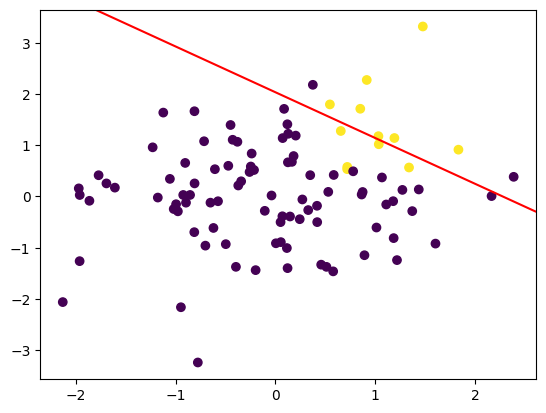

In [27]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(1000) : 
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# 결정 경계 그리기 
plt.scatter(x[:,0], x[:,1], c=y)
x_min, x_max = plt.xlim() # x 좌표 최소값 최대값 
y_min, y_max = plt.ylim() # Y 좌표 최소값 최대값 

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
"""
np.meshgrid() -> x, y 좌표를 기반으로 격자 포인트 생성

xx, yy -> 2차원 배열 가집니다.
"""

z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float32)).detach().numpy()
"""
 xx yy -> np.c_[] : xx yy 연결-> torch.tensor 변경하고 ravel() -> 2차원 배열 1차원 평면화 -> 변환된 입력 -> 모델 전달 
 -> .detach().numpy() 예측값을 넘파이 형태로변환 -> z 저장

"""
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[0.5], colors='r')
"""
plt.contour() -> xx, yy 격자에 대응하는 결정경계 그리는 함수 
"""
plt.show()
